# Homework 1

## DS 3000: Foundation of Data Science

Name: Vivian Shu Yi Li <br>
NUID: 001506227 <br>
Date: May 21, 2023 <br>

In [1]:
# import libraries
from collections import Counter
import random as rnd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1. The Condorcet Jury

In [2]:
def jury_plot(n_jurors, trials=10000):
    """ create a plot of majority accuracy vs individual juror's accuracy
    args:
        n_jurors (int): number of jurors in each trial
        trials (int): 10000 as default number of total trials
    
    return:
        graph of majority accuracy vs individual juror's accuracy
    """
    # create a list of jurors' accuracies (same across) and majority accuracies
    individual_acc = list(np.linspace(0,1, n_jurors))
    majority_acc = []
    
    # iterate thru each individual accuracy with randomized outcomes for each trials
    for accuracy in individual_acc:
        outcomes = [rnd.choice([0,1]) for _ in range(trials)]
        
        # for each outcome, each juror makes a verdict decision
        verdicts = []
        for out in outcomes:
            verdict = []
            for i in range(n_jurors):
                
                # check for accuracy & add to verdict
                if rnd.random() < accuracy:
                    verdict.append(out)
                else:
                    verdict.append(1-out)
                    
            # append most common outcome aka majority verdict
            verdicts.append(Counter(verdict).most_common(1)[0][0])

        # Compute the jury verdict accuracy of overall trials to find majority accuracy
        correct = 0
        for i in range(len(outcomes)):
            if outcomes[i] == verdicts[i]:
                correct += 1
        p_accuracy = correct / len(outcomes)
        
        # add the accuracy to the majority accuracy list
        majority_acc.append(p_accuracy)

    # plot
    plt.plot(individual_acc, majority_acc, label = 'Jurors: ' + str(n_jurors))
    
    
    

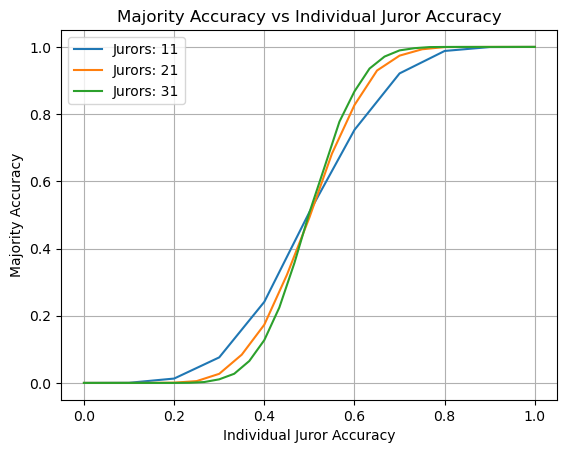

In [3]:
# plot the accuracy for each value in list
n_jurors = [11,21,31]
for n in n_jurors:
    jury_plot(n, trials=10000)

# label plots
plt.legend()
plt.title('Majority Accuracy vs Individual Juror Accuracy')
plt.xlabel('Individual Juror Accuracy')
plt.ylabel('Majority Accuracy')
plt.grid(True)
plt.show()

## 2. Modeling Infection

[0.16905177314365127]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


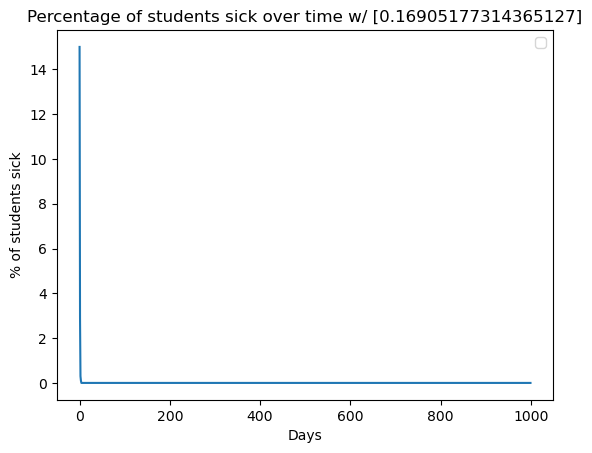

In [4]:
# initialize mxn values & psick (given); m = days & n = student
m = 1000
n = 1000
p_sick = 0.15

# randomize the infect_value
infect_v = [rnd.uniform(0.0, 1)]
print(infect_v)

# initalize array & first row with random students infected (=1) 
students = np.zeros((m, n))
infected_students = np.random.choice(range(m), int(p_sick*n), replace=False)
students[0, infected_students] = 1

# store percentage of sick students
sick_student_p = []

# iterate thru each day
for day in range(1, m):
    for student in range(n):
        # if student sick yesterday, healthy today
        if students[day-1, student] == 1:  
            students[day, student] = 0

        # if neighbor sick yesterday, student is prob infected today
        else:
            # left neighbor
            if student > 0:
                left_student = students[day-1, student-1]
                if left_student == 1 and np.random.rand() < infect_v[0]:
                    students[day, student] = 1
            # right neighbor
            elif student < n-1:
                right_student = students[day-1, student+1]
                if right_student == 1 and np.random.rand() < infect_v[0]:
                    students[day, student] = 1
            else:
                students[day, student] = 0
            
sick_percent = np.sum(students, axis=1) / n * 100
sick_student_p.append(sick_student_p)

# Plot the percentage of students sick
plt.plot(sick_percent)
plt.title(label=f'Percentage of students sick over time w/ {infect_v}')
plt.xlabel("Days")
plt.ylabel("% of students sick")
plt.legend()
plt.show()

## 3. Boston Tree

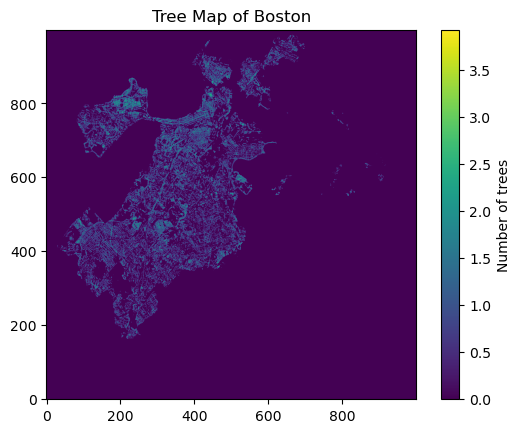

In [5]:
# upload data
tree_data = pd.read_csv('trees.csv')

# initalize array
tree_map = np.zeros((1000, 1000), dtype=int)

# Define the bounds of the map (given)
lat_b = [42.2, 42.4]
lon_b = [-71.2, -70.9]

# Iterate over the rows 
for index, row in tree_data.iterrows():
    # Get the latitude and longitude from the dataset
    lat = row['Y']
    lon = row['X']

    # Check if the coordinates are within the defined bounds
    if lat_b[0] <= lat <= lat_b[1] and lon_b[0] <= lon <= lon_b[1]:
        # Transform to i, j coord.
        lat_r = (lat - lat_b[0]) / (lat_b[1] - lat_b[0])
        lon_r = (lon - lon_b[0]) / (lon_b[1] - lon_b[0])
        
        j_coord = int(lat_r * 999)
        i_coord = 999 - int(lon_r * 999)  

        # increase count of trees
        tree_map[i_coord, j_coord] += 1

# label & fix the plot
plt.title('Tree Map of Boston')
tree_map = np.rot90(tree_map, k=-1)
plt.imshow(np.log(tree_map + 1), origin = 'lower')
plt.colorbar(label='Number of trees')
plt.show()